In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import pyproj
#dbf
from dbfread import DBF
import seaborn as sns

In [234]:
#데이터 셋 불러오기

shopping = pd.read_csv("data/shopping_trends.csv")

In [190]:
shopping.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [191]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

-------------

# 겨울 인기 상품 ❄️☃️

In [248]:
shopping_season = shopping[['Item Purchased', 'Season']]
shopping_season.head()

,Item Purchased,Season
0,Blouse,Winter
1,Sweater,Winter
2,Jeans,Spring
3,Sandals,Spring
4,Blouse,Spring


In [249]:
shopping_winter = shopping_season.set_index('Season')
shopping_winter = shopping_winter.loc['Winter'].reset_index()
shopping_winter

,Season,Item Purchased
0,Winter,Blouse
1,Winter,Sweater
2,Winter,Shorts
3,Winter,Shorts
4,Winter,Coat
...,...,...
966,Winter,Skirt
967,Winter,Shirt
968,Winter,Socks
969,Winter,Shirt


In [250]:
shopping_winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Season          971 non-null    object
 1   Item Purchased  971 non-null    object
dtypes: object(2)
memory usage: 15.3+ KB


In [251]:
#import matplotlib.pyplot as plt
#import seaborn as sns

In [254]:
shopping_winter_group = shopping_winter.groupby(['Item Purchased']).count().reset_index()
shopping_winter_group

,Item Purchased,Season
0,Backpack,25
1,Belt,40
2,Blouse,40
3,Boots,31
4,Coat,39
5,Dress,40
6,Gloves,32
7,Handbag,34
8,Hat,40
9,Hoodie,48


Text(0.5, 1.0, 'Item Category Popularity in Winter')

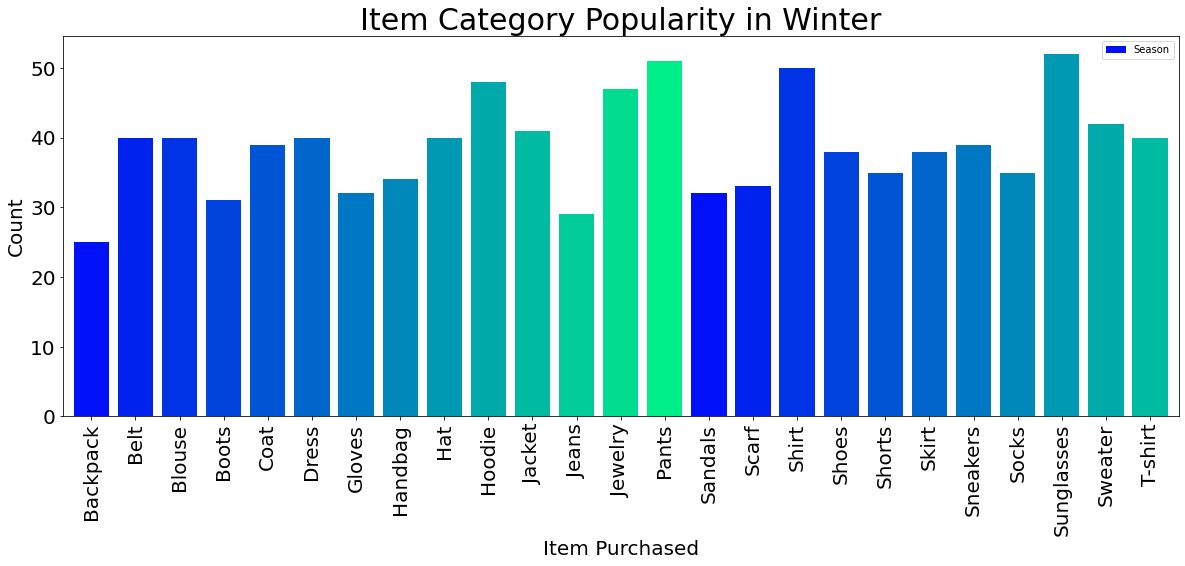

In [255]:
colors = sns.color_palette('winter',len('Item Purchased'))

shopping_winter_group.plot.bar(x = 'Item Purchased', y = 'Season', fontsize = 20, figsize = (20, 7), color = colors, width = 0.8)

plt.xlabel('Item Purchased', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title("Item Category Popularity in Winter", fontsize = 30)

----------

# 아이템과 계절의 상관관계 🤷🏼‍♂️

In [200]:
shopping_season.head()

,Item Purchased,Season
0,Blouse,Winter
1,Sweater,Winter
2,Jeans,Spring
3,Sandals,Spring
4,Blouse,Spring


In [201]:
shopping_winter_group.head()

,Item Purchased,Season
0,Backpack,25
1,Belt,40
2,Blouse,40
3,Boots,31
4,Coat,39


In [256]:
shopping_fall = shopping_season.set_index('Season')
shopping_fall = shopping_fall.loc['Fall'].reset_index()
shopping_fall

,Season,Item Purchased
0,Fall,Shirt
1,Fall,Shoes
2,Fall,Jacket
3,Fall,Handbag
4,Fall,Dress
...,...,...
970,Fall,Shoes
971,Fall,Pants
972,Fall,Hat
973,Fall,Sandals


In [257]:
shopping_fall_group = shopping_fall.groupby(['Item Purchased']).count().reset_index()
shopping_fall_group

,Item Purchased,Season
0,Backpack,34
1,Belt,41
2,Blouse,42
3,Boots,35
4,Coat,34
5,Dress,36
6,Gloves,37
7,Handbag,48
8,Hat,50
9,Hoodie,36


In [258]:
shopping_spring = shopping_season.set_index('Season')
shopping_spring = shopping_spring.loc['Spring'].reset_index()
shopping_spring

,Season,Item Purchased
0,Spring,Jeans
1,Spring,Sandals
2,Spring,Blouse
3,Spring,Handbag
4,Spring,Dress
...,...,...
994,Spring,Dress
995,Spring,Skirt
996,Spring,Backpack
997,Spring,Belt


In [259]:
shopping_spring_group = shopping_spring.groupby(['Item Purchased']).count().reset_index()
shopping_spring_group.head()

,Item Purchased,Season
0,Backpack,39
1,Belt,41
2,Blouse,46
3,Boots,40
4,Coat,46


In [260]:
shopping_summer = shopping_season.set_index('Season')
shopping_summer = shopping_summer.loc['Summer'].reset_index()
shopping_summer

,Season,Item Purchased
0,Summer,Sneakers
1,Summer,Coat
2,Summer,Sweater
3,Summer,Pants
4,Summer,Pants
...,...,...
950,Summer,Hat
951,Summer,Jewelry
952,Summer,Jewelry
953,Summer,Hoodie


In [261]:
shopping_summer_group = shopping_summer.groupby(['Item Purchased']).count().reset_index()
shopping_summer_group.head(5)

,Item Purchased,Season
0,Backpack,45
1,Belt,39
2,Blouse,43
3,Boots,38
4,Coat,42


In [262]:
shopping_fall_group = shopping_fall_group.rename(columns = {'Season' : 'Fall'})

In [263]:
shopping_spring_group = shopping_spring_group.rename(columns = {'Season' : 'Spring'})

In [264]:
shopping_summer_group = shopping_summer_group.rename(columns = {'Season' : 'Summer'})

In [265]:
shopping_winter_group = shopping_winter_group.rename(columns = {'Season' : 'Winter'})

In [266]:
shopping_fall_group.head()

,Item Purchased,Fall
0,Backpack,34
1,Belt,41
2,Blouse,42
3,Boots,35
4,Coat,34


In [267]:
shopping_spring_group.head()

,Item Purchased,Spring
0,Backpack,39
1,Belt,41
2,Blouse,46
3,Boots,40
4,Coat,46


In [268]:
shopping_summer_group.head()

,Item Purchased,Summer
0,Backpack,45
1,Belt,39
2,Blouse,43
3,Boots,38
4,Coat,42


In [269]:
shopping_winter_group.head()

,Item Purchased,Winter
0,Backpack,25
1,Belt,40
2,Blouse,40
3,Boots,31
4,Coat,39


In [270]:
shopping_sum = pd.merge(shopping_fall_group, shopping_spring_group, how='outer', on = 'Item Purchased')
shopping_sum = pd.merge(shopping_sum, shopping_summer_group, how='outer', on = 'Item Purchased')
shopping_sum = pd.merge(shopping_sum, shopping_winter_group, how='outer', on = 'Item Purchased')
shopping_sum

,Item Purchased,Fall,Spring,Summer,Winter
0,Backpack,34,39,45,25
1,Belt,41,41,39,40
2,Blouse,42,46,43,40
3,Boots,35,40,38,31
4,Coat,34,46,42,39
5,Dress,36,43,47,40
6,Gloves,37,42,29,32
7,Handbag,48,36,35,34
8,Hat,50,27,37,40
9,Hoodie,36,36,31,48


In [271]:
shopping_season

,Item Purchased,Season
0,Blouse,Winter
1,Sweater,Winter
2,Jeans,Spring
3,Sandals,Spring
4,Blouse,Spring
...,...,...
3895,Hoodie,Summer
3896,Backpack,Spring
3897,Belt,Spring
3898,Shoes,Summer


## 하 ㅅㅂ 안된다 🤬

------

# 봄 인기 상품 🌼🌿

Text(0.5, 1.0, 'Item Category Popularity in Spring')

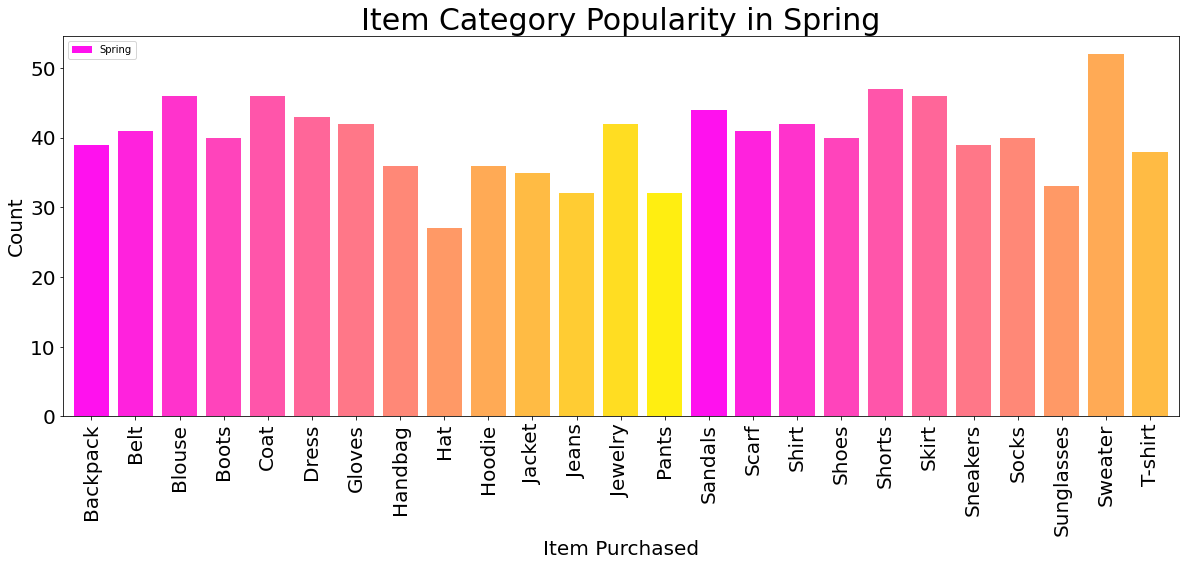

In [272]:
colors = sns.color_palette('spring',len('Item Purchased'))

shopping_spring_group.plot.bar(x = 'Item Purchased', y = 'Spring', fontsize = 20, figsize = (20, 7), color = colors, width = 0.8)

plt.xlabel('Item Purchased', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title("Item Category Popularity in Spring", fontsize = 30)

---------

# 여름 인기 상품 🍉👙

Text(0.5, 1.0, 'Item Category Popularity in Summer')

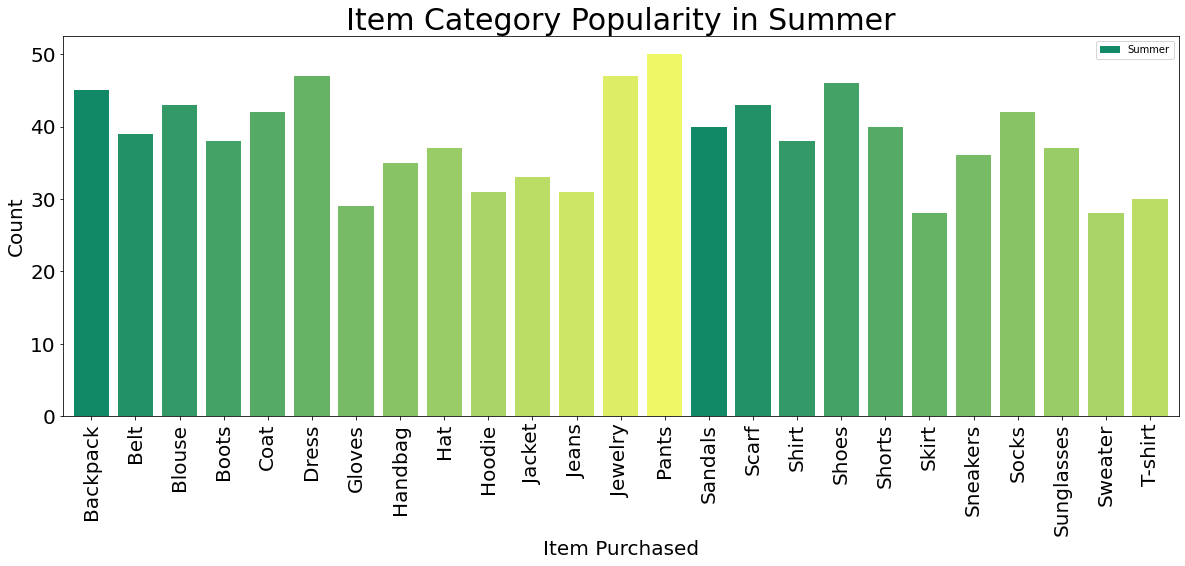

In [273]:
colors = sns.color_palette('summer',len('Item Purchased'))

shopping_summer_group.plot.bar(x = 'Item Purchased', y = 'Summer', fontsize = 20, figsize = (20, 7), color = colors, width = 0.8)

plt.xlabel('Item Purchased', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title("Item Category Popularity in Summer", fontsize = 30)

--------

# 가을 인기 상품 🍂🥮

Text(0.5, 1.0, 'Item Category Popularity in Fall')

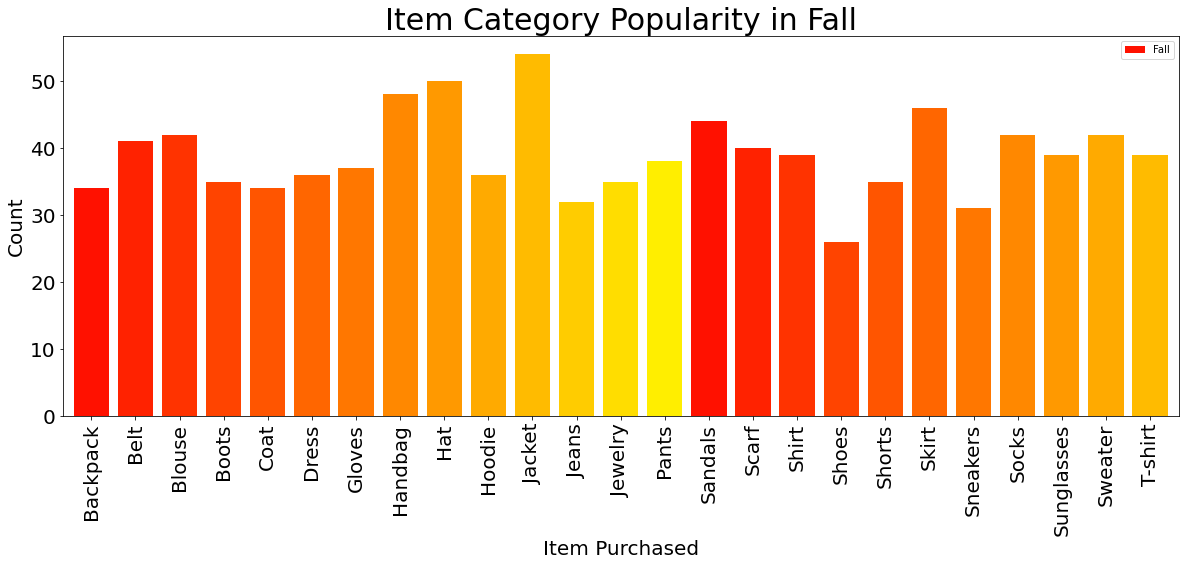

In [274]:
colors = sns.color_palette('autumn',len('Item Purchased'))

shopping_fall_group.plot.bar(x = 'Item Purchased', y = 'Fall', fontsize = 20, figsize = (20, 7), color = colors, width = 0.8)

plt.xlabel('Item Purchased', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title("Item Category Popularity in Fall", fontsize = 30)

----

# 나이별 구매 수량🧒🏻👵🏼

In [280]:
shopping = pd.read_csv("data/shopping_trends.csv")

In [281]:
shopping.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [282]:
def age_categorize(age):
    age = (age // 10) * 10
    return age

In [283]:
Age_category = shopping.Age.apply(age_categorize)
Age_category

0       50
1       10
2       50
3       20
4       40
        ..
3895    40
3896    50
3897    40
3898    40
3899    50
Name: Age, Length: 3900, dtype: int64

Age_category = Age_category.astype('category')
Age_category

In [285]:
shopping.insert(2, 'Age_category', Age_category)
shopping.head()

,Customer ID,Age,Age_category,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,50,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,10,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,20,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,40,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


--------

# 아이템과 계절의 상관관계 2🤷🏼‍♂️

In [338]:
shopping_season = shopping[['Item Purchased', 'Season']]
shopping_season.head()

,Item Purchased,Season
0,Blouse,Winter
1,Sweater,Winter
2,Jeans,Spring
3,Sandals,Spring
4,Blouse,Spring


In [339]:
shopping_season.head()

,Item Purchased,Season
0,Blouse,Winter
1,Sweater,Winter
2,Jeans,Spring
3,Sandals,Spring
4,Blouse,Spring


In [340]:
#from sklearn.preprocessing import LabelEncoder

In [341]:
le = LabelEncoder()
le.fit_transform(shopping_season['Season'])

array([3, 3, 1, ..., 1, 2, 1])

In [342]:
shopping_season_1 = shopping_season

In [343]:
shopping_season_1['Season_1'] = le.fit_transform(shopping_season['Season'])

/var/folders/3w/jtc4z_yn10n17_mmvxgxl8mw0000gn/T/ipykernel_15935/4222870349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_season_1['Season_1'] = le.fit_transform(shopping_season['Season'])


In [344]:
shopping_season_1

,Item Purchased,Season,Season_1
0,Blouse,Winter,3
1,Sweater,Winter,3
2,Jeans,Spring,1
3,Sandals,Spring,1
4,Blouse,Spring,1
...,...,...,...
3895,Hoodie,Summer,2
3896,Backpack,Spring,1
3897,Belt,Spring,1
3898,Shoes,Summer,2


## 라벨 인코딩 결과값
- spring : 1
- summer : 2
- winter : 3
- fall : 4

In [345]:
shopping_summer_incoding = shopping_season_1.groupby(['Item Purchased', 'Season']).count().reset_index()
shopping_summer_incoding

,Item Purchased,Season,Season_1
0,Backpack,Fall,34
1,Backpack,Spring,39
2,Backpack,Summer,45
3,Backpack,Winter,25
4,Belt,Fall,41
...,...,...,...
95,Sweater,Winter,42
96,T-shirt,Fall,39
97,T-shirt,Spring,38
98,T-shirt,Summer,30


In [346]:
shopping_summer_incoding = shopping_summer_incoding.pivot('Item Purchased','Season', 'Season_1')
shopping_summer_incoding

Season,Fall,Spring,Summer,Winter
Item Purchased,,,,
Backpack,34,39,45,25
Belt,41,41,39,40
Blouse,42,46,43,40
Boots,35,40,38,31
Coat,34,46,42,39
Dress,36,43,47,40
Gloves,37,42,29,32
Handbag,48,36,35,34
Hat,50,27,37,40


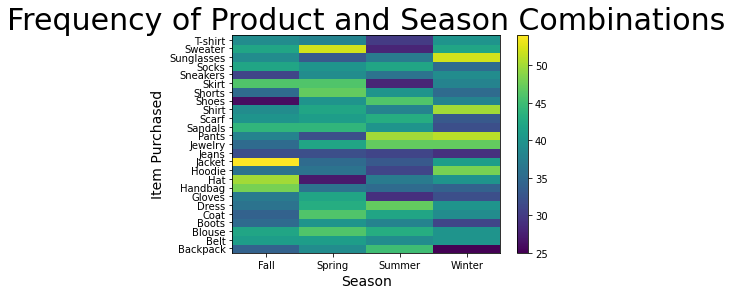

In [367]:
plt.pcolor(shopping_summer_incoding)


plt.xticks(np.arange(0.5, len(shopping_summer_incoding.columns), 1), shopping_summer_incoding.columns)
plt.yticks(np.arange(0.5, len(shopping_summer_incoding.index), 1), shopping_summer_incoding.index)
plt.title('Frequency of Product and Season Combinations', fontsize = 30)
plt.xlabel('Season', fontsize = 14)
plt.ylabel('Item Purchased', fontsize = 14)
plt.colorbar()

plt.show()


In [357]:
#import seaborn as sns

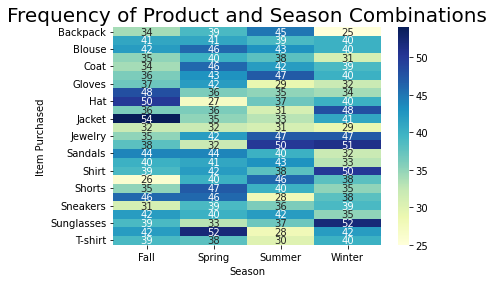

In [366]:
sns.heatmap(shopping_summer_incoding, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Frequency of Product and Season Combinations', fontsize=20)
plt.show()

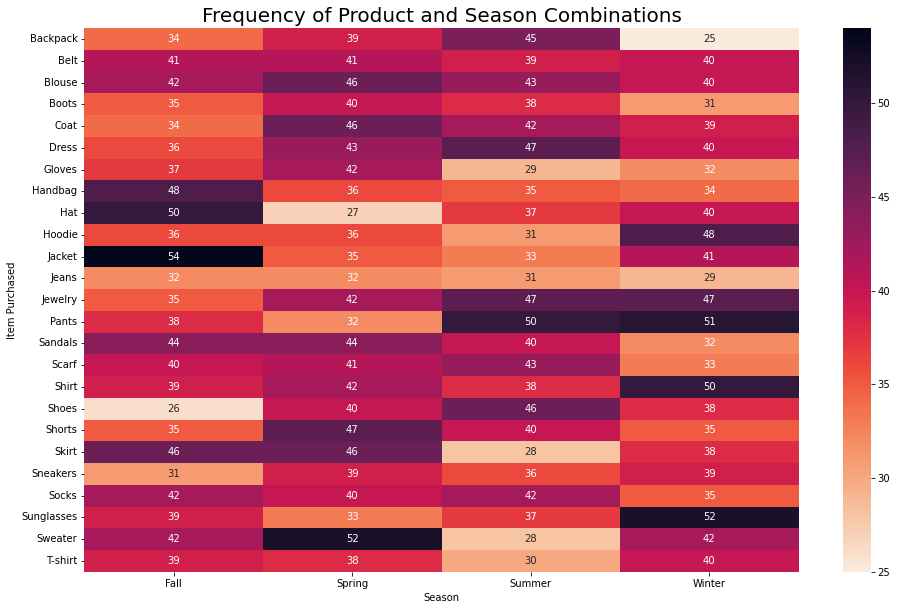

In [370]:
plt.figure(figsize = (16,10))

sns.heatmap(shopping_summer_incoding,
            annot = True,
            cmap = 'rocket_r')

plt.title('Frequency of Product and Season Combinations', fontsize=20)
plt.show()